<a href="https://colab.research.google.com/github/AverbakhMV/Kodland/blob/main/Kodland_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Выборка для тестового задания.xlsx to Выборка для тестового задания.xlsx


In [ ]:
pip install openpyxl==3.0.9

In [ ]:
df = pd.read_excel('./Выборка для тестового задания.xlsx')

In [ ]:
df.head()

,id,age,Дата первого занятия,Курс,М2
0,2538.0,11.0,2021-02-28,Unity,0.0
1,2615.0,12.0,2021-02-14,Unity,0.0
2,2643.0,14.0,2021-02-21,Веб-дизайн,1.0
3,2968.0,11.0,2021-01-24,Python Базовый,0.0
4,3014.0,15.0,2021-03-14,Веб-дизайн,1.0


In [ ]:
df.shape

(2172, 5)

In [ ]:
df.describe()

,id,age,М2
count,2172.000000,2022.000000,2172.000000
mean,15077.744475,13.115232,0.353591
std,2761.292894,1.562194,0.478194
min,2538.000000,8.000000,0.000000
25%,13306.500000,12.000000,0.000000
50%,15177.000000,13.000000,0.000000
75%,17442.250000,14.000000,1.000000
max,19815.000000,19.000000,1.000000


In [ ]:
df = df.rename(columns = {'Дата первого занятия': 'first_class_date', 'Курс': 'course', 'М2': 'mod2'})

In [ ]:
df["age"].value_counts()

12.0    487
13.0    478
14.0    405
15.0    236
11.0    212
16.0    109
10.0     47
17.0     30
9.0       9
8.0       5
19.0      2
18.0      2
Name: age, dtype: int64

In [ ]:
df.dtypes

id                         float64
age                        float64
first_class_date    datetime64[ns]
course                      object
mod2                       float64
dtype: object

In [ ]:
df.sort_values(['first_class_date'])

,id,age,first_class_date,course,mod2
108,10425.0,13.0,2021-01-10,Python Базовый,0.0
66,10111.0,12.0,2021-01-10,Python Базовый,0.0
167,10899.0,12.0,2021-01-10,Python Базовый,0.0
64,10101.0,14.0,2021-01-10,Python Базовый,1.0
63,10100.0,15.0,2021-01-10,Python Базовый,0.0
...,...,...,...,...,...
1858,18125.0,14.0,2021-03-28,Python Базовый,0.0
1857,18120.0,13.0,2021-03-28,Python Базовый,0.0
1856,18118.0,12.0,2021-03-28,Python Базовый,0.0
1852,18107.0,13.0,2021-03-28,Python Базовый,0.0


In [ ]:
df.sort_values(['first_class_date']).sample(10)

,id,age,first_class_date,course,mod2
1607,17369.0,10.0,2021-03-14,Python Базовый,1.0
1137,15414.0,12.0,2021-02-28,Python Базовый,0.0
1757,17830.0,12.0,2021-03-21,Python Базовый,0.0
150,10726.0,15.0,2021-01-17,Unity,1.0
1661,17526.0,11.0,2021-03-21,Python Базовый,0.0
1440,16726.0,11.0,2021-03-21,Python Базовый,0.0
994,14741.0,NaN,2021-02-21,Веб-дизайн,1.0
1665,17540.0,12.0,2021-03-21,Python Базовый,0.0
128,10567.0,12.0,2021-01-17,Python Базовый,1.0
402,12449.0,14.0,2021-01-31,Python Базовый,0.0


Посмотрев сэмпл несколько раз видно, что курсы начинаются раз в неделю

In [ ]:
df.isnull().sum()

id                    0
age                 150
first_class_date      0
course                0
mod2                  0
dtype: int64

Так как для первого задания возраст студента не важен, можно оставить нулевые значения в таблице. 
При подсчете оттока студентов мы должны учитывать только студентов, начавших учиться минимум 4 недели назад, т.к. те, кто начал учиться раньше еще не прошли первый модуль. Учитывая, что последний поток начал учиться 28.03.21 мы считаем студентов с датой первого занятия 28.02.2021 и ранее


In [ ]:
df1 = df[df['first_class_date'] <= '2021-02-28']

Считаем количество студентов, присутсвовавших на первом модуле в разрезе курсов

In [ ]:
df_courses = df1.groupby(['course']).agg({'id': 'count'}).rename(columns = {'id': 'mod1'})

Считаем количество студентов, присутсвовавших на втором модуле в разрезе курсов

In [ ]:
df_courses['mod2'] = df1.query('mod2==1').groupby(['course']).agg({'id': 'count'})


Добавим столбец с долей оттока в %

In [ ]:
df_courses['churn'] = round((df_courses.mod1 - df_courses.mod2) * 100 / df_courses.mod1, 2)

In [ ]:
df_courses

,mod1,mod2,churn
course,,,
Python Базовый,811,383,52.77
Unity,65,29,55.38
Веб-дизайн,251,142,43.43


(20.0, 70.0)

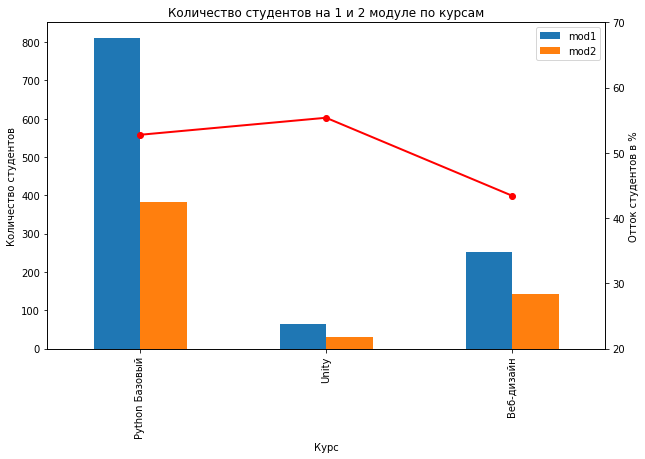

In [89]:
ax = df_courses[['mod1', 'mod2']].plot(kind='bar', figsize=(10, 6))
plt.title("Количество студентов на 1 и 2 модуле по курсам")
plt.xlabel("Курс")
plt.ylabel("Количество студентов")
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         df_courses['churn'].values, color='r',
         linestyle='-',
         marker='o', linewidth=2.0)
ax2.set_ylabel("Отток студентов в %")
ax2.set_ylim((20, 70))


В процентном соотношении самый большой отток студентов на курсе Unity, но количество студентов этого курса намного меньше, чем на курсе Python базовый, поэтому отток на курсе Питон имеет больший негативный эффект и необходимо сосредоточить усилия на удержании студентов курса Питон

Для подсчета динамики оттока по возрастам нужно удалить строки с нулевым возрастом. Также оставляем только учеников на курсе Python Базовый

In [ ]:
df1 = df1.query('course == "Python Базовый"').dropna()

In [ ]:
df1['age'].value_counts()

12.0    232
13.0    192
14.0    128
11.0     91
15.0     62
10.0     21
16.0     17
17.0      4
8.0       2
9.0       2
Name: age, dtype: int64

Удаляем учеников 8, 9 и 17 лет, т.к. их количества не достаточно для анализа и считаем количество начавших учиться студентов по возрастам

In [ ]:
df_age = df1.query('9<age<17').groupby(['age']).agg({'id': 'count'}).rename(columns = {'id': 'mod1'})

In [ ]:
df_age['mod2'] = df1.query('mod2 == 1').groupby(['age']).agg({'id': 'count'})

In [ ]:
df_age['churn'] = round((df_age.mod1 - df_age.mod2) * 100 / df_age.mod1, 2)

In [ ]:
df_age

,mod1,mod2,churn
age,,,
10.0,21,11,47.62
11.0,91,42,53.85
12.0,232,99,57.33
13.0,192,99,48.44
14.0,128,59,53.91
15.0,62,31,50.00
16.0,17,9,47.06


(20.0, 70.0)

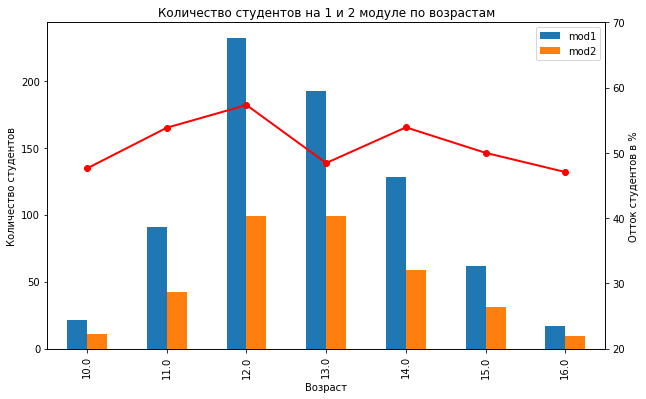

In [90]:
ax = df_age[['mod1', 'mod2']].plot(kind='bar', figsize=(10, 6))
plt.title("Количество студентов на 1 и 2 модуле по возрастам")
plt.xlabel("Возраст")
plt.ylabel("Количество студентов")
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         df_age['churn'].values, color='r',
         linestyle='-',
         marker='o', linewidth=2.0)
ax2.set_ylabel("Отток студентов в %")
ax2.set_ylim((20, 70))

Гипотеза о том, что дети младше 12 и старше 14 лет чаще переходят в отток не оправдалась. Наибольший отток приходится на 12 и 14 лет, при этом самый низкий отток в возрасте 10 и 16 лет. Хотя, в целом, количество учеников 10 и 16 лет самое низкое и, возможно, при накоплении статистики по этим возрастам отток увеличится.